# PROJECT TOPIC : 120 years of Olympic history: athletes and results

### About Olympics

=>The Olympic Games is the most popular international sports event conducted in a nominated country and overseen by the International Olympic Committee (IOC). This committee takes care of the event’s development and organisation.

There are two types of Olympic Games organised during summer and winter. Both are organised and conducted by a particular country based on the nominations made. The time is decided based on the months of summer and winter of the hosting country.

The different types of Olympic Games are as follows:

Summer Olympics As the name suggests, the Summer Olympics are held in a country when there is summer season. The sports events will need such weather conditions to ensure their proper conductance. The 2020 Olympics conducted 33 sports events.

Winter Olympics Paralympics Youth Olympic Games (YOG) Link of the Dataset:https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/code

# Understanding the Data

1)Name: The name of the athlete

2)Age: The age of the athlete at the time of the summer games

3)Sex: Gender of the athlete

4)Height: The height of the athlete in centimeters

5)Weight: The weight of the athlete in kilograms

6)Team: The country or team that the athlete represented in the summer games

7)NOC: The National Olympic Committee code for the country that the athlete represented

8)Games: The name and year of the summer games

9)Year: The year of the summer games

10)Season: The season of summer or winter games

11)City: The host city of the summer games

12)Sport: The sport in which the athlete participated

13)Event: The event in which the athlete participated

14)Medal: The medal won by the athlete in the event, if any

# Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
import warnings 
warnings.filterwarnings('ignore')

## Reading CSV file----> athlete_events(new)

In [2]:
athlete_events=pd.read_csv('athlete_events(new).csv')

## Displaying first five records of athlete_events(new)

In [3]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## DATA CLEANING

In [4]:
filter_data = athlete_events[["Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", "Medal"]]
filter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


1) selected columns are "Sex", "Age", "Height", "Weight", "Team", "Year", "Season", "Sport", "Event", and "Medal".

2) selected columns are stored in a new DataFrame called "filter_data".

## Using the info() method which will provide all the information about dataframe :

Total no. of rows (index)

Total no. of columns

Name of all the columns

Data-type of all the columns

Non-null entries in the records

In [5]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     271116 non-null  object 
 1   Age     261642 non-null  float64
 2   Height  210945 non-null  float64
 3   Weight  208241 non-null  float64
 4   Team    271116 non-null  object 
 5   Year    271116 non-null  int64  
 6   Season  271116 non-null  object 
 7   Sport   271116 non-null  object 
 8   Event   271116 non-null  object 
 9   Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 20.7+ MB


1) There are total 271116 Rows and 10 Columns

2) There are 6 Categorical columns,1 integer column and 3 Float columns

## Using describe() method which provides data of only numeric columns data like:


count

mean

Standard deviation

minimum value(Outliers)

first Quartile (Q1)--->25%

median (Q2)---->50%

third Quartile (Q3)--->75%

maximum value(Outliers)

df.describe()

In [6]:
filter_data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


### Checking Null or missing values in the columns

In [7]:
filter_data.isnull().sum()

Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
Year           0
Season         0
Sport          0
Event          0
Medal     231333
dtype: int64

Calculating Age, Height and Weight columns mean inorder to fill missing values with respective columns mean

In [8]:
Age_mean=filter_data['Age'].mean()
Age_mean

25.556898357297374

In [9]:
filter_data['Age'].fillna(Age_mean,inplace=True)

In [10]:
Height_mean=filter_data['Height'].mean()
Height_mean

175.33896987366376

In [11]:
filter_data['Height'].fillna(Height_mean,inplace=True)

In [12]:
wt_mean=filter_data['Weight'].mean()
wt_mean

70.70239290053351

In [13]:
filter_data['Weight'].fillna(wt_mean,inplace=True)

In [14]:
filter_data.isnull().sum()

Sex            0
Age            0
Height         0
Weight         0
Team           0
Year           0
Season         0
Sport          0
Event          0
Medal     231333
dtype: int64

we cannot fill missing values of medal column with its mean value because every participants not getting medal

## Univariate Analysis

In [15]:
cat_cols=filter_data.select_dtypes(include="O")
cat_cols.columns

Index(['Sex', 'Team', 'Season', 'Sport', 'Event', 'Medal'], dtype='object')

In [16]:
feature=['Sex','Sport','Season']

In [17]:
list(enumerate(feature))

[(0, 'Sex'), (1, 'Sport'), (2, 'Season')]

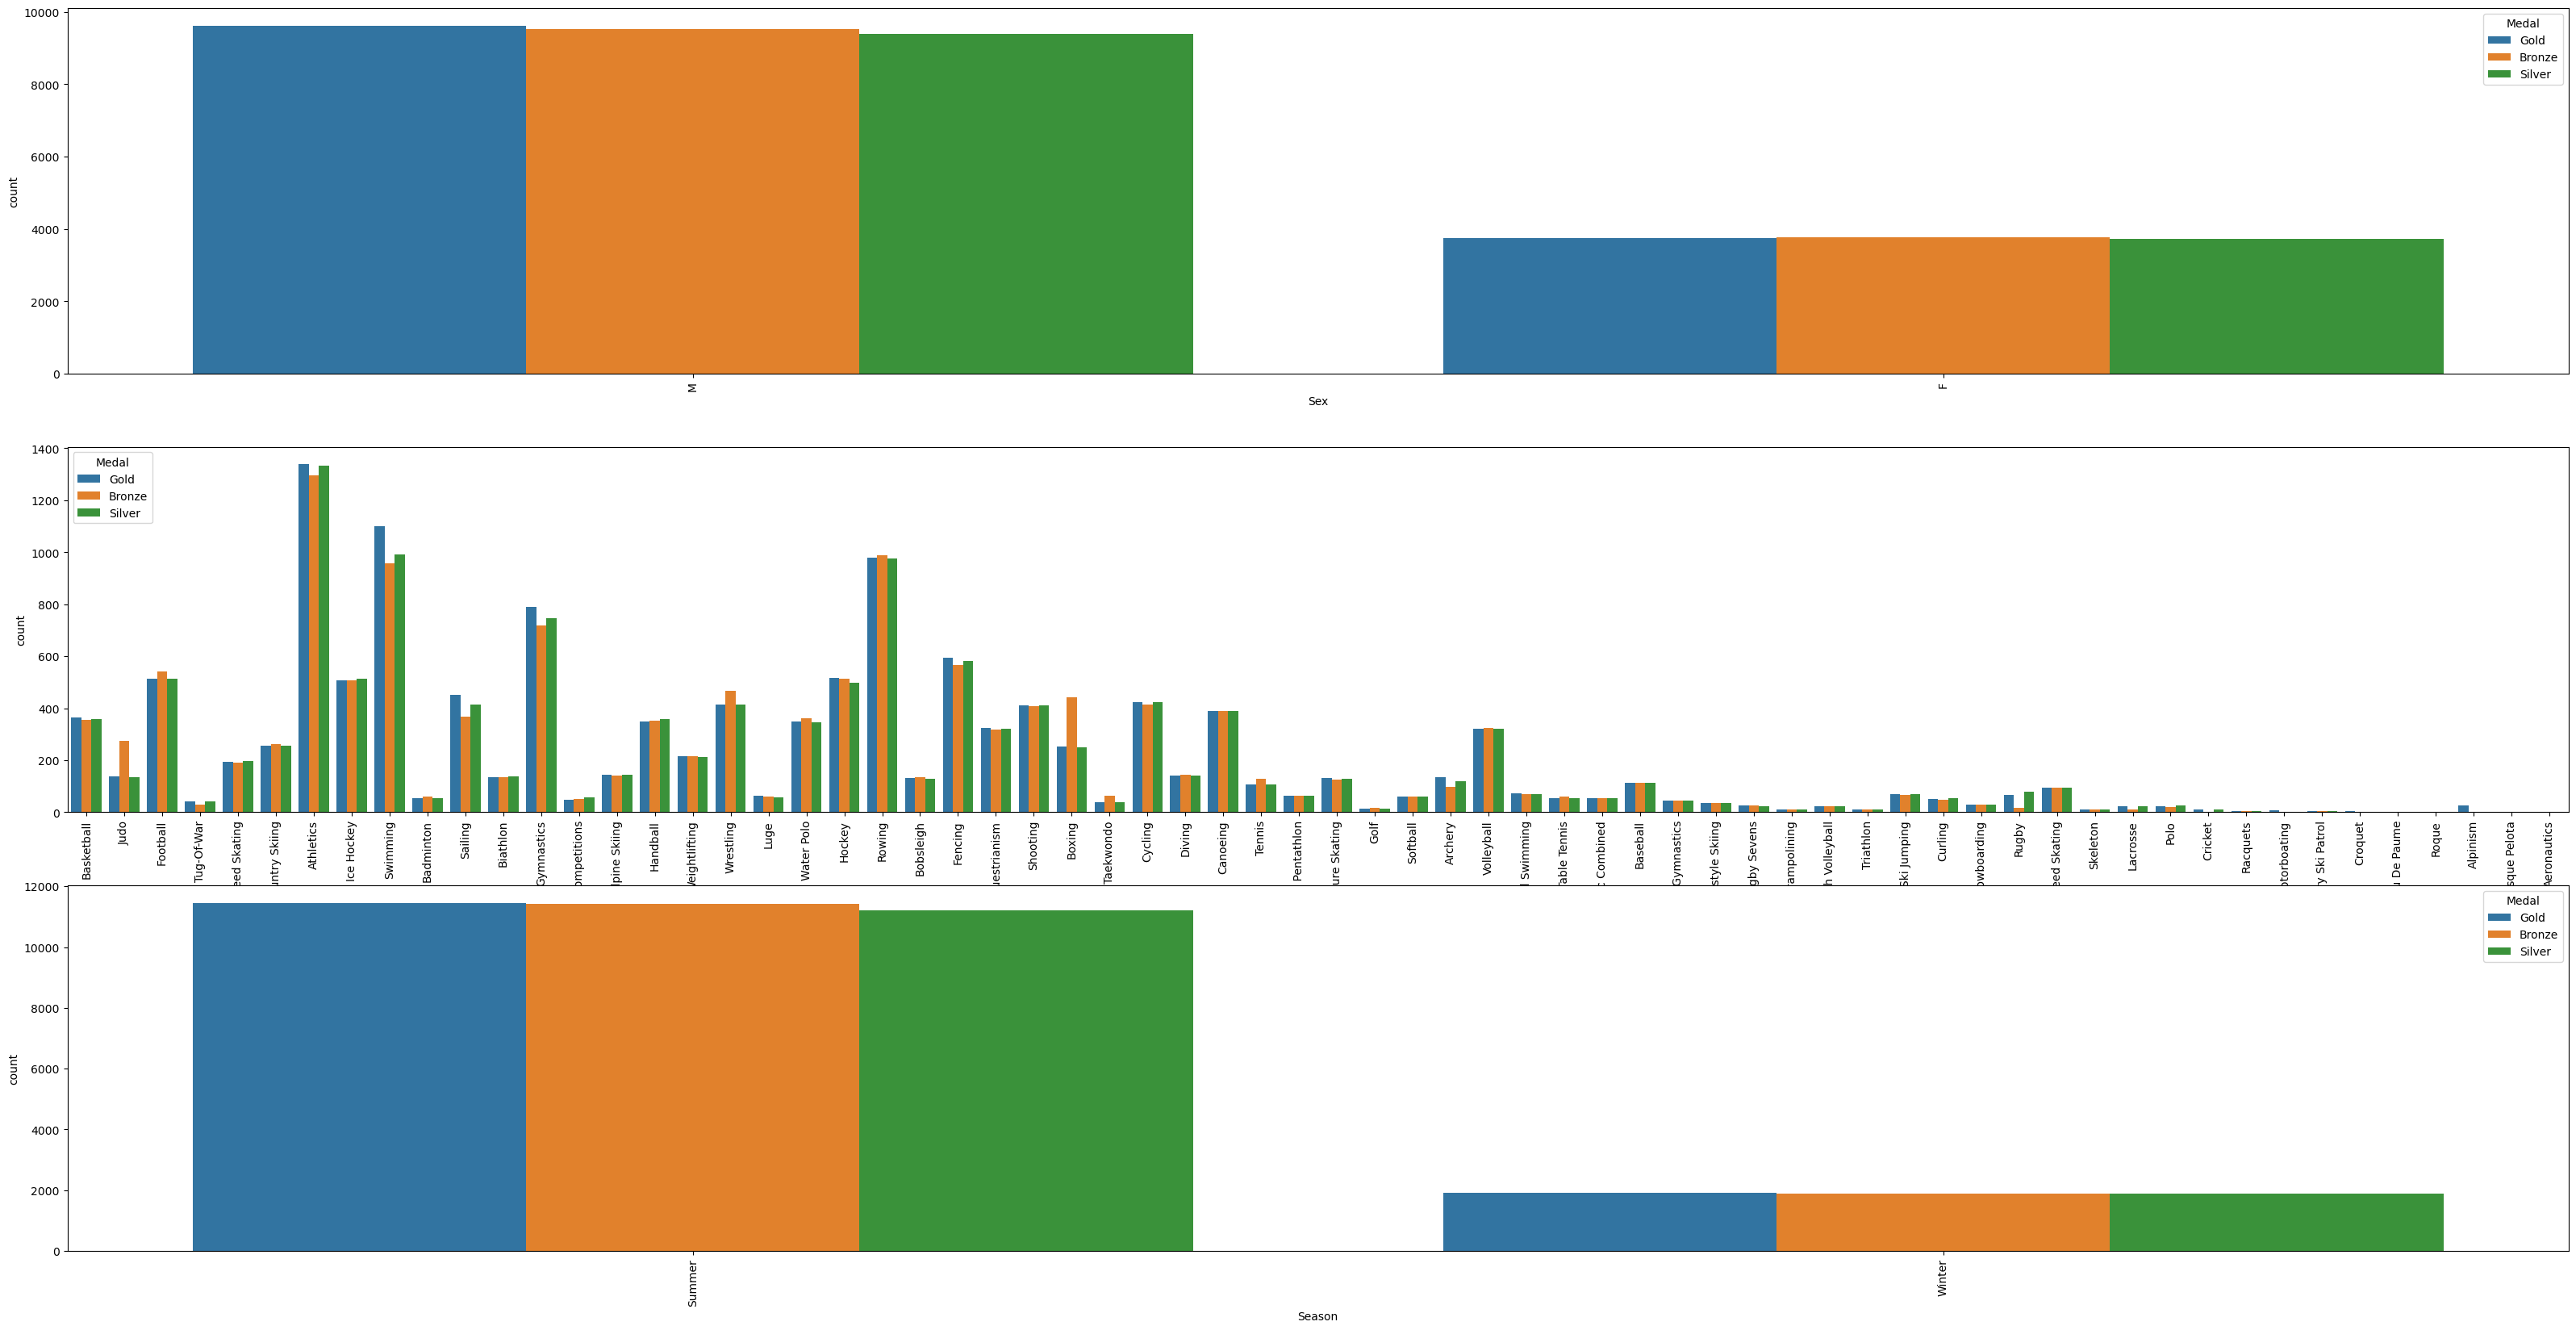

In [18]:
plt.figure(figsize=(40,20))
for i in enumerate(feature):
    plt.subplot(3,1,i[0]+1)
    sns.countplot(i[1], hue='Medal',data=filter_data)
    plt.xticks(rotation=90)

1) Male athletes have won a Maximum number of medals (gold, silver, bronze) compared to female athletes.

2) Athletics is the sport in which participants have won the maximum number of medals (gold, silver, bronze).

3) Participants have won a Maximum number of medals (gold, silver, bronze) in the Summer Olympics as compared to the Winter Olympics.

In [19]:
num_cols=filter_data.select_dtypes(include=["int","float"])

In [20]:
num_cols.columns

Index(['Age', 'Height', 'Weight', 'Year'], dtype='object')

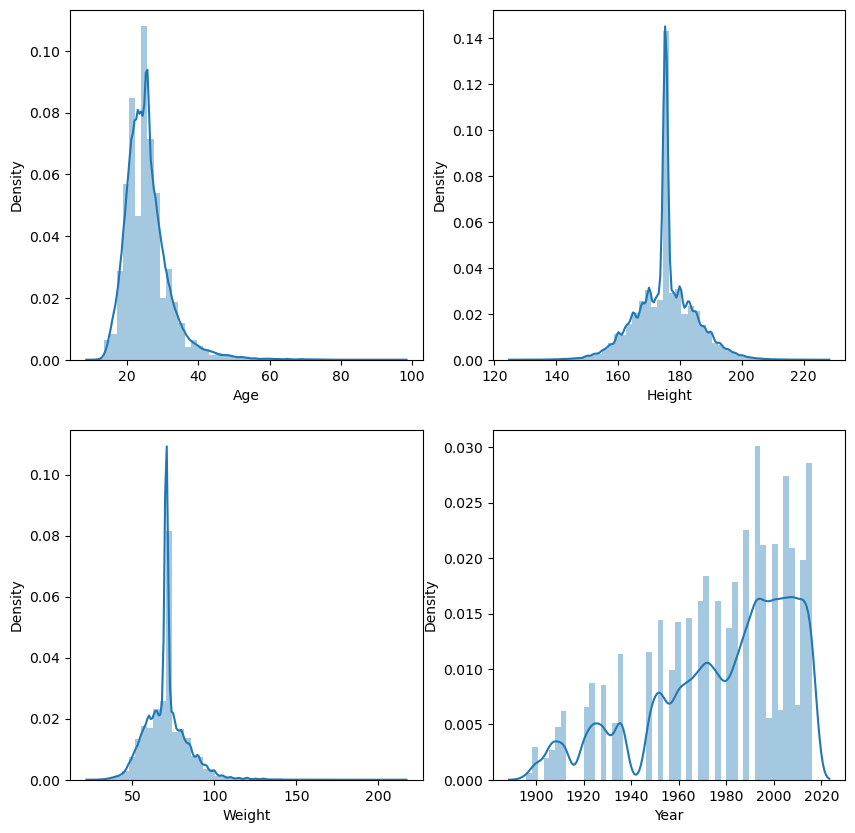

In [21]:
plt.figure(figsize=(10,10))
count=1
for i in num_cols:
    plt.subplot(2,2,count)
    sns.distplot(filter_data[i])
    count+=1
plt.show()

1)The maximum age group of participants falls between the ages of 20 and 40.

2)The height of the maximum number of participants is between 175-180 cm.

3)The weight of the maximum number of participants falls between 50-100 kg.

4)The number of participants increases every year.


## Scatter Plot

Text(0.5, 1.0, 'Age vs. Height')

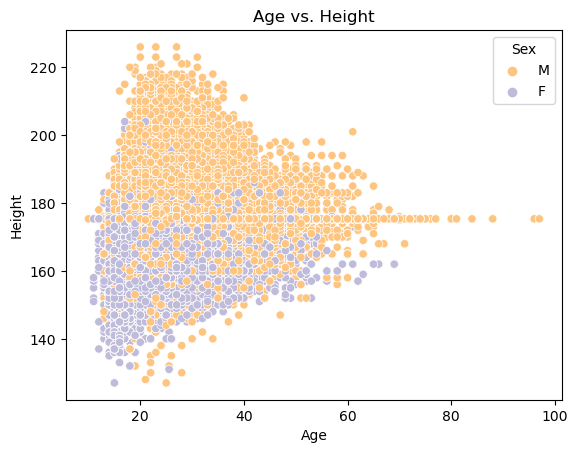

In [22]:
sns.scatterplot(x='Age', y='Height', hue='Sex', data=filter_data, palette='PuOr')
plt.title('Age vs. Height')

## Line Plot

<AxesSubplot:xlabel='Age', ylabel='Height'>

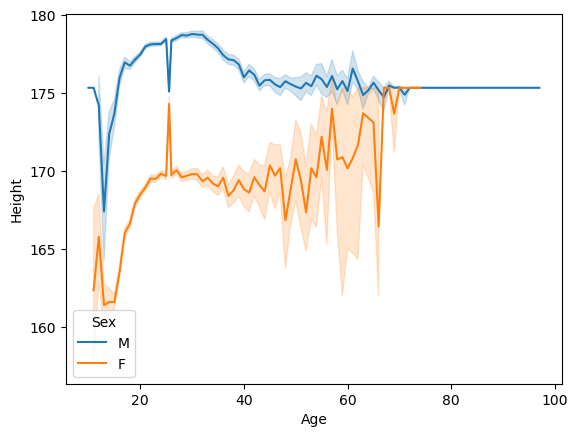

In [23]:
sns.lineplot(x='Age', y='Height', data=filter_data, hue='Sex')

## Box Plot

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

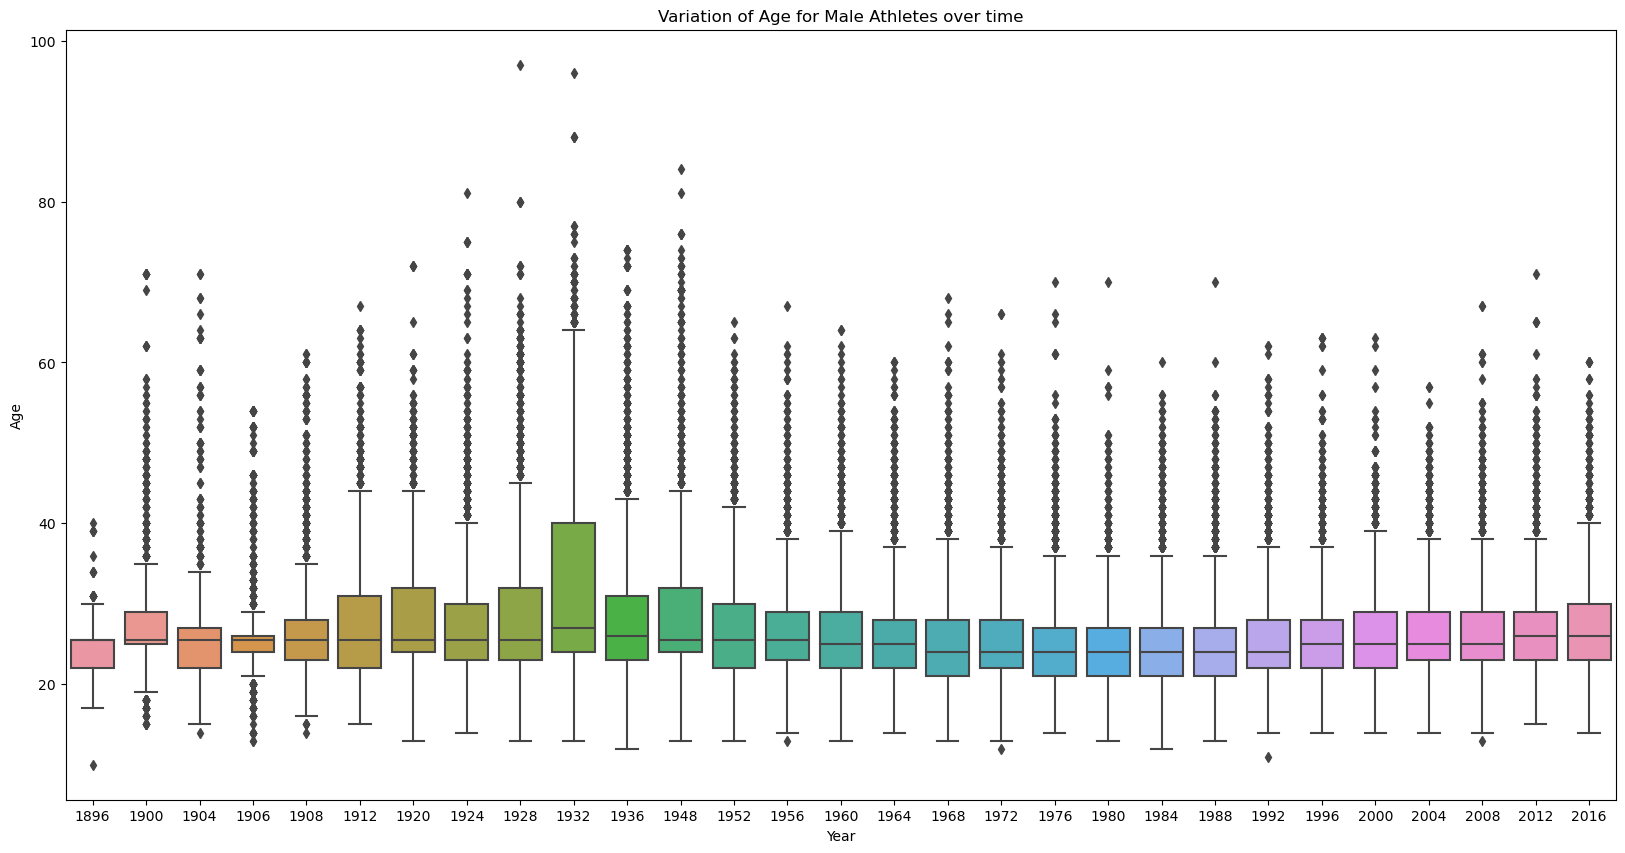

In [24]:
Men_data = filter_data[(filter_data.Sex == 'M') & (filter_data.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=Men_data)
plt.title('Variation of Age for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

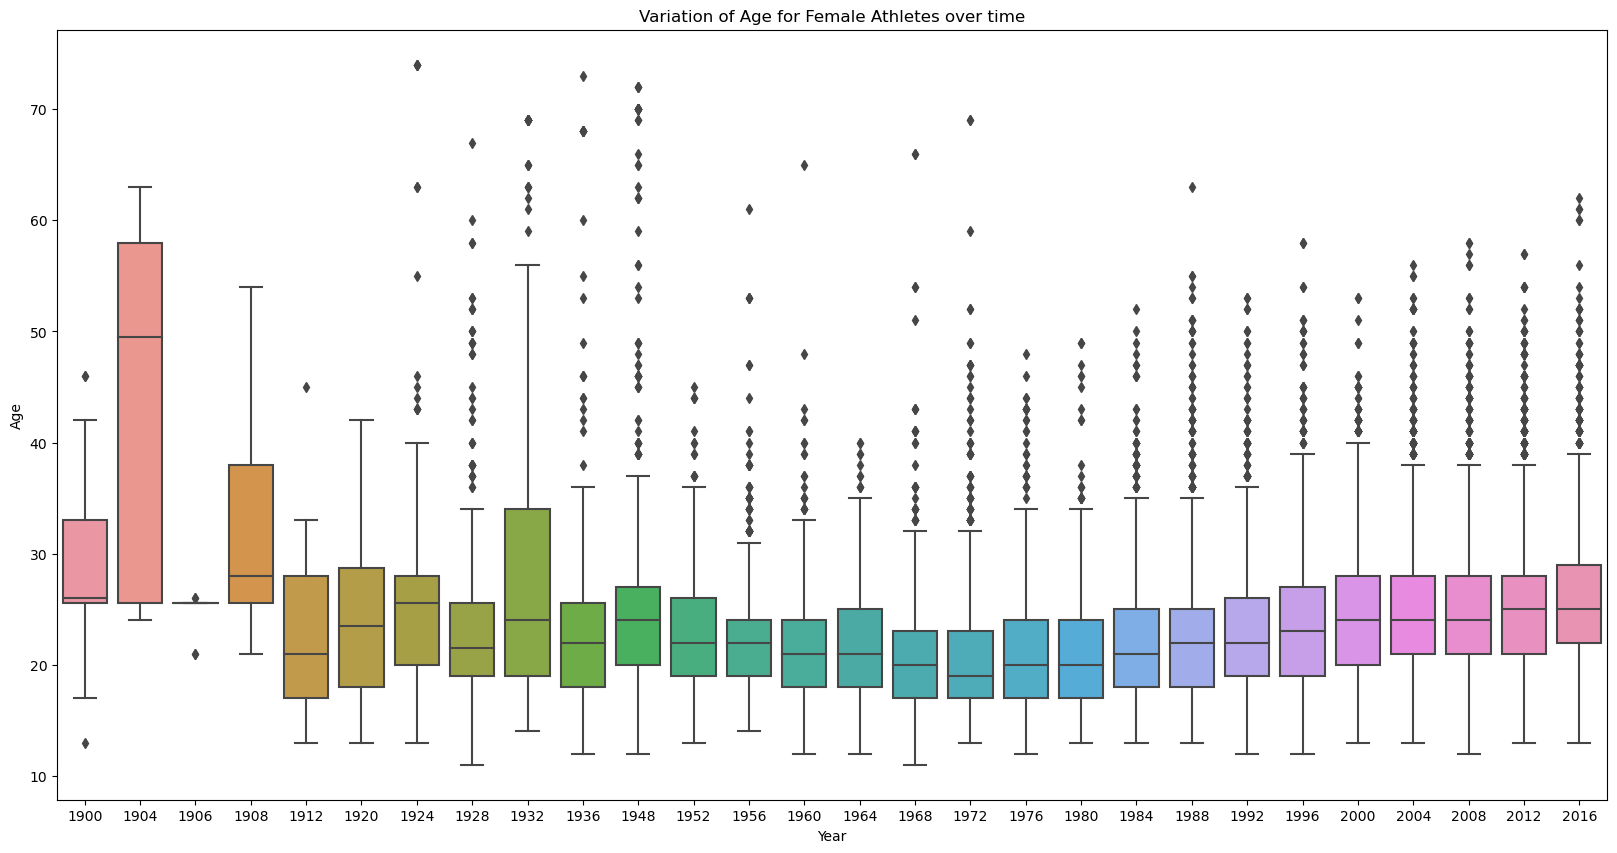

In [25]:
women_data = filter_data[(filter_data['Sex'] == 'F') & (filter_data.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=women_data)
plt.title('Variation of Age for Female Athletes over time')

### Get the data for winter Olympic

In [26]:
winter_data = filter_data[filter_data["Season"] == "Winter"]
winter_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
4,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
5,F,21.0,185.0,82.0,Netherlands,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
7,F,25.0,185.0,82.0,Netherlands,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,F,27.0,185.0,82.0,Netherlands,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


It retrieve only the data related to the Winter Olympics. The resulting data frame contains information on all Winter Olympics held in different years, including details such as the host city, year, country, athlete's name, sport, event, medal won, and more.

### Get the data for summer Olympic

In [27]:
summer_data = filter_data[(filter_data["Season"] == "Summer")]
summer_data.head()

,Sex,Age,Height,Weight,Team,Year,Season,Sport,Event,Medal
0,M,24.0,180.00000,80.000000,China,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,M,23.0,170.00000,60.000000,China,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Football,Football Men's Football,NaN
3,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,F,18.0,168.00000,70.702393,Netherlands,1932,Summer,Athletics,Athletics Women's 100 metres,NaN


It retrieve only the data related to the Summer Olympics. The resulting data frame contains information on all Summer Olympics held in different years, including details such as the host city, year, country, athlete's name, sport, event, medal won, and more.

### append summer and winter Sports into 2 lists 

In [28]:
summer_sports = summer_data["Sport"].unique()
winter_sports = winter_data['Sport'].unique()

# K-nearest neighbors (KNN)


KNN is a popular machine learning algorithm used for classification and regression tasks. It works by identifying the k-nearest neighbors to a given data point and assigning it to the most common class or the average value of its neighbors.

This trains and tests a KNN model on male athletes' data in every Summer Olympic sport to predict if an athlete will win a medal based on their age, height, and weight.

The model is trained using different k values, and the testing scores are plotted to determine the optimal value for k.

1) It loops through every Summer Olympic sport using the variable sport.

2) filters the summer_data to only include male athletes' data for a specific sport and selects the columns "Age," "Height," "Weight," and "Medal." The data is then cleaned by dropping rows with missing values for "Height" and "Weight" columns, and "Medal" column is converted into a binary form, where 1 denotes if an athlete won a medal, and 0 if they did not.

3) The data is split into training and testing sets, where 75% of the data is used for training and 25% for testing.

4) The data is standardized using the StandardScaler model to ensure that each feature is on the same scale.

5) The KNN model is then trained for different k values, where k represents the number of nearest neighbors considered when making predictions. The model's accuracy is evaluated using both training and testing scores, and the results are appended to separate lists train_scores and test_scores.

6) then plots the testing scores for different values of k to determine the optimal value that produces the highest accuracy score.

### For loop to train the KNN model and get the testing score for male athletes in every Summer Olympic Sport

(3280, 3)
(3280,)
Basketball
k: 11, Train/Test Score: 0.807/0.780
k: 17, Train/Test Score: 0.796/0.791
k: 23, Train/Test Score: 0.794/0.791
k: 29, Train/Test Score: 0.790/0.790
k: 35, Train/Test Score: 0.792/0.793
k: 41, Train/Test Score: 0.792/0.788


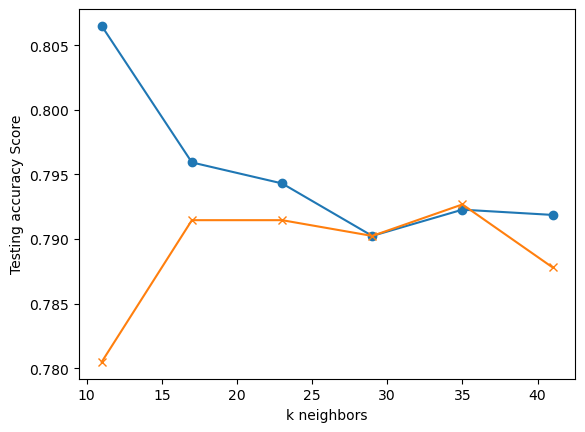

----------------------------------------------------
(2708, 3)
(2708,)
Judo
k: 11, Train/Test Score: 0.867/0.880
k: 17, Train/Test Score: 0.867/0.882
k: 23, Train/Test Score: 0.867/0.882
k: 29, Train/Test Score: 0.867/0.882
k: 35, Train/Test Score: 0.867/0.882
k: 41, Train/Test Score: 0.867/0.882


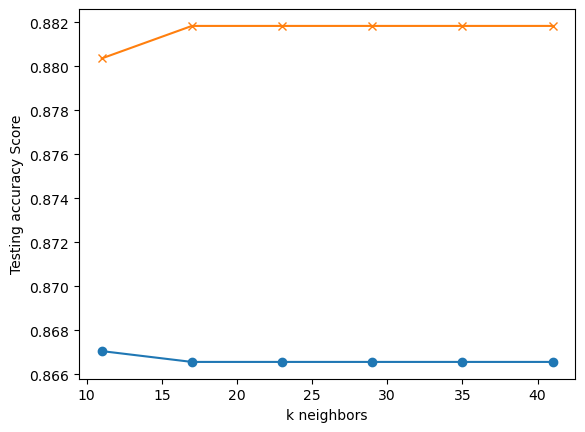

----------------------------------------------------
(5733, 3)
(5733,)
Football
k: 11, Train/Test Score: 0.769/0.778
k: 17, Train/Test Score: 0.777/0.791
k: 23, Train/Test Score: 0.777/0.791
k: 29, Train/Test Score: 0.777/0.791
k: 35, Train/Test Score: 0.777/0.792
k: 41, Train/Test Score: 0.776/0.792


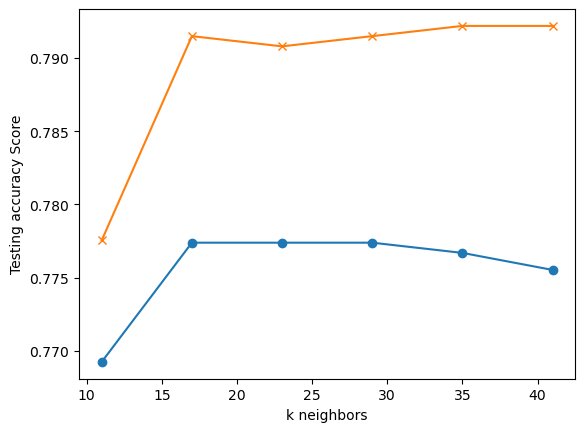

----------------------------------------------------
(170, 3)
(170,)
Tug-Of-War
k: 11, Train/Test Score: 0.677/0.488
k: 17, Train/Test Score: 0.685/0.488
k: 23, Train/Test Score: 0.661/0.488
k: 29, Train/Test Score: 0.685/0.558
k: 35, Train/Test Score: 0.677/0.674
k: 41, Train/Test Score: 0.677/0.674


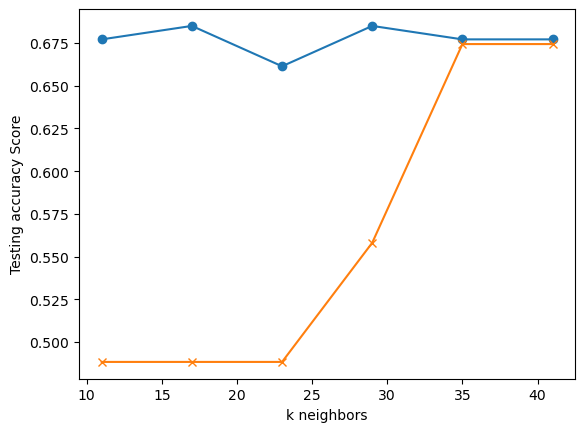

----------------------------------------------------
(26958, 3)
(26958,)
Athletics
k: 11, Train/Test Score: 0.900/0.898
k: 17, Train/Test Score: 0.900/0.900
k: 23, Train/Test Score: 0.900/0.900
k: 29, Train/Test Score: 0.900/0.900
k: 35, Train/Test Score: 0.900/0.900
k: 41, Train/Test Score: 0.900/0.900


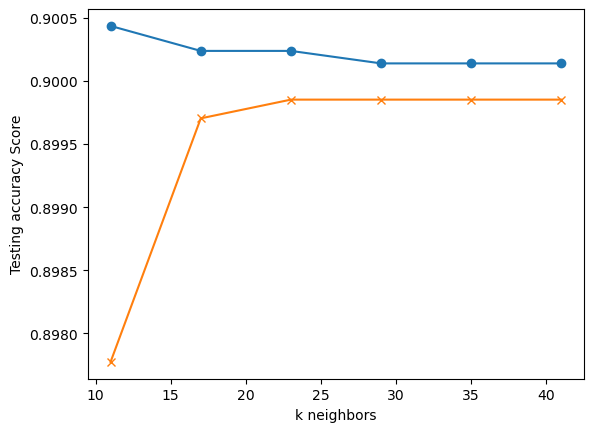

----------------------------------------------------
(13345, 3)
(13345,)
Swimming
k: 11, Train/Test Score: 0.878/0.876
k: 17, Train/Test Score: 0.875/0.877
k: 23, Train/Test Score: 0.874/0.881
k: 29, Train/Test Score: 0.873/0.880
k: 35, Train/Test Score: 0.873/0.879
k: 41, Train/Test Score: 0.873/0.879


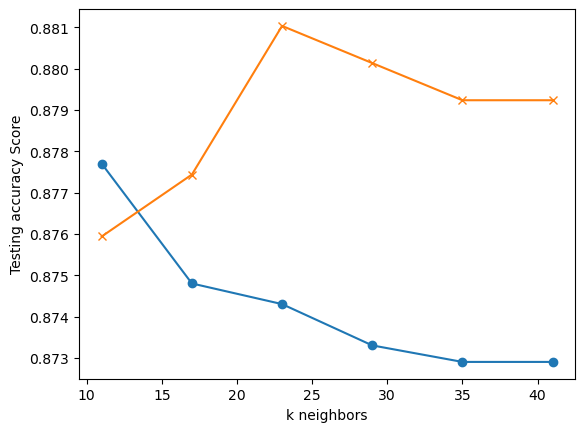

----------------------------------------------------
(717, 3)
(717,)
Badminton
k: 11, Train/Test Score: 0.890/0.861
k: 17, Train/Test Score: 0.890/0.861
k: 23, Train/Test Score: 0.890/0.861
k: 29, Train/Test Score: 0.890/0.861
k: 35, Train/Test Score: 0.890/0.861
k: 41, Train/Test Score: 0.890/0.861


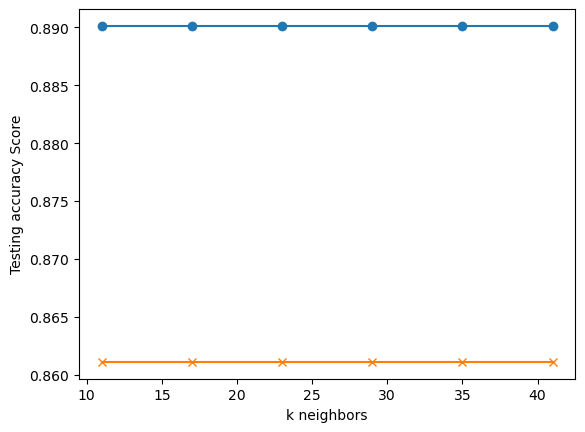

----------------------------------------------------
(5660, 3)
(5660,)
Sailing
k: 11, Train/Test Score: 0.805/0.799
k: 17, Train/Test Score: 0.801/0.792
k: 23, Train/Test Score: 0.806/0.801
k: 29, Train/Test Score: 0.807/0.803
k: 35, Train/Test Score: 0.807/0.804
k: 41, Train/Test Score: 0.807/0.804


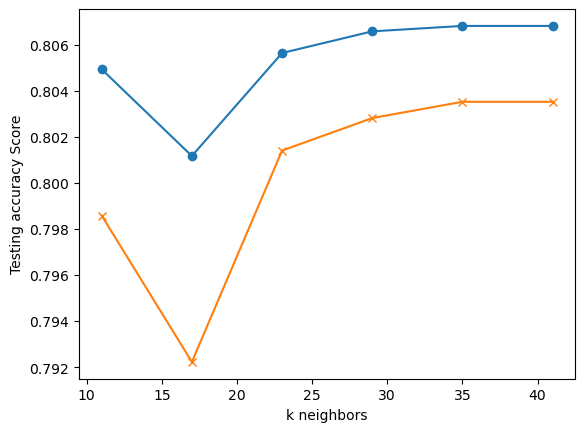

----------------------------------------------------
(17578, 3)
(17578,)
Gymnastics
k: 11, Train/Test Score: 0.912/0.913
k: 17, Train/Test Score: 0.912/0.912
k: 23, Train/Test Score: 0.911/0.912
k: 29, Train/Test Score: 0.911/0.912
k: 35, Train/Test Score: 0.911/0.912
k: 41, Train/Test Score: 0.911/0.912


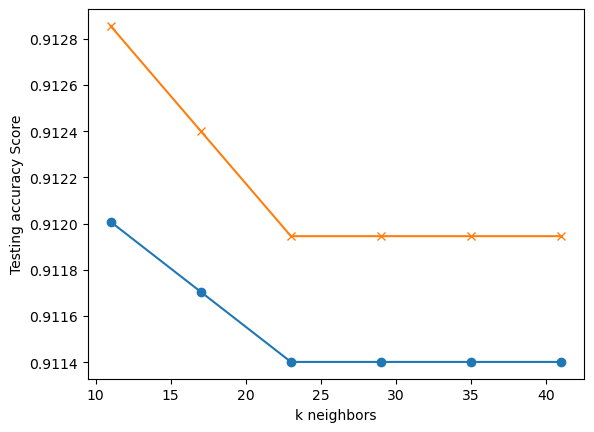

----------------------------------------------------
(3201, 3)
(3201,)
Art Competitions
k: 11, Train/Test Score: 0.955/0.955
k: 17, Train/Test Score: 0.955/0.955
k: 23, Train/Test Score: 0.955/0.955
k: 29, Train/Test Score: 0.955/0.955
k: 35, Train/Test Score: 0.955/0.955
k: 41, Train/Test Score: 0.955/0.955


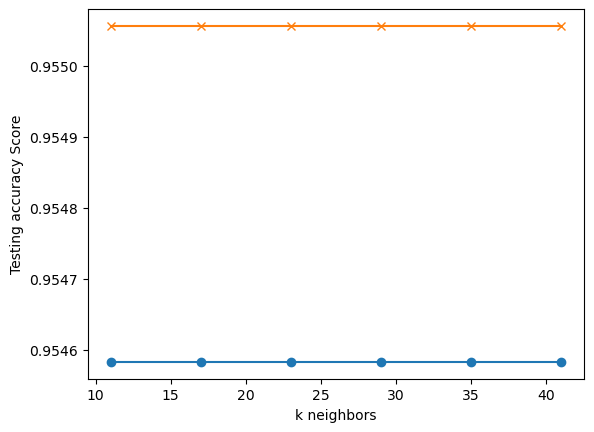

----------------------------------------------------
(2264, 3)
(2264,)
Handball
k: 11, Train/Test Score: 0.756/0.724
k: 17, Train/Test Score: 0.750/0.731
k: 23, Train/Test Score: 0.745/0.735
k: 29, Train/Test Score: 0.739/0.740
k: 35, Train/Test Score: 0.739/0.737
k: 41, Train/Test Score: 0.740/0.742


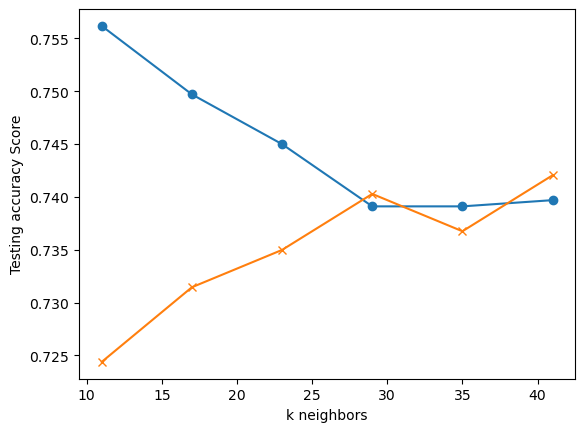

----------------------------------------------------
(3474, 3)
(3474,)
Weightlifting
k: 11, Train/Test Score: 0.846/0.840
k: 17, Train/Test Score: 0.846/0.841
k: 23, Train/Test Score: 0.846/0.840
k: 29, Train/Test Score: 0.846/0.840
k: 35, Train/Test Score: 0.846/0.840
k: 41, Train/Test Score: 0.846/0.840


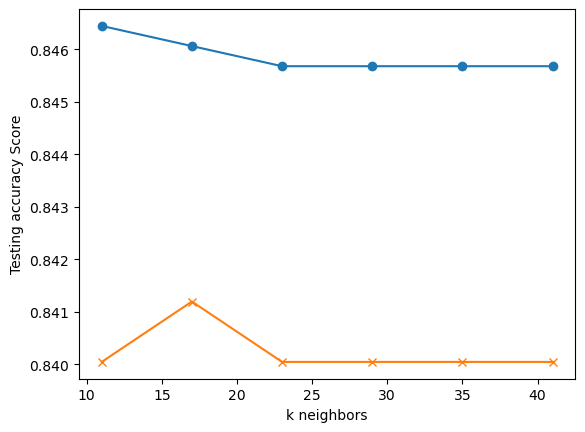

----------------------------------------------------
(6850, 3)
(6850,)
Wrestling
k: 11, Train/Test Score: 0.823/0.819
k: 17, Train/Test Score: 0.819/0.827
k: 23, Train/Test Score: 0.818/0.828
k: 29, Train/Test Score: 0.818/0.828
k: 35, Train/Test Score: 0.818/0.828
k: 41, Train/Test Score: 0.818/0.828


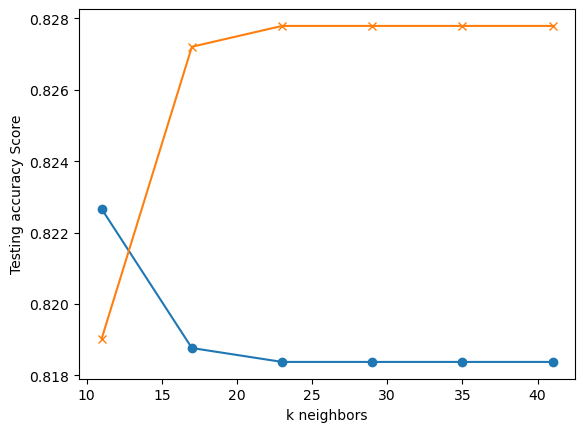

----------------------------------------------------
(3358, 3)
(3358,)
Water Polo
k: 11, Train/Test Score: 0.751/0.736
k: 17, Train/Test Score: 0.739/0.749
k: 23, Train/Test Score: 0.734/0.757
k: 29, Train/Test Score: 0.736/0.758
k: 35, Train/Test Score: 0.737/0.756
k: 41, Train/Test Score: 0.736/0.758


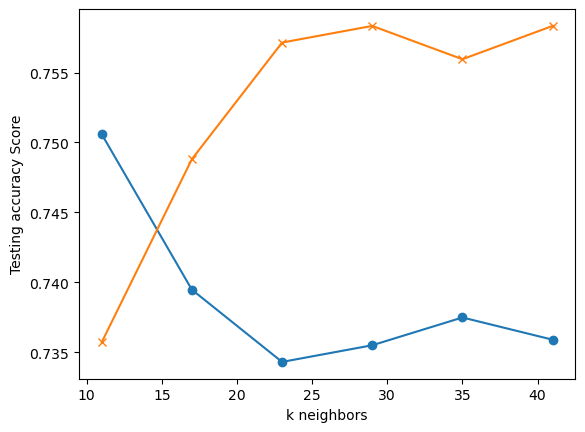

----------------------------------------------------
(3958, 3)
(3958,)
Hockey
k: 11, Train/Test Score: 0.741/0.699
k: 17, Train/Test Score: 0.738/0.701
k: 23, Train/Test Score: 0.739/0.707
k: 29, Train/Test Score: 0.737/0.717
k: 35, Train/Test Score: 0.738/0.723
k: 41, Train/Test Score: 0.738/0.723


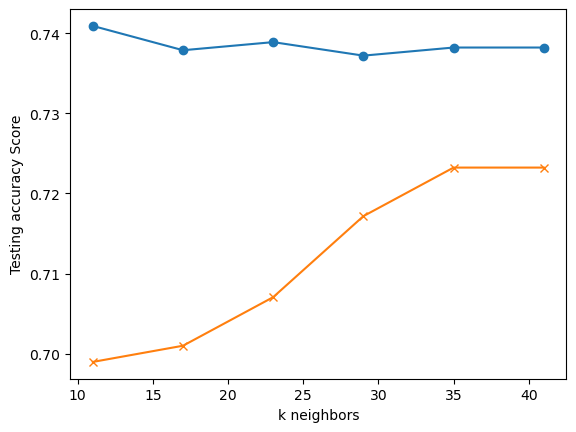

----------------------------------------------------
(8402, 3)
(8402,)
Rowing
k: 11, Train/Test Score: 0.734/0.728
k: 17, Train/Test Score: 0.725/0.728
k: 23, Train/Test Score: 0.724/0.740
k: 29, Train/Test Score: 0.724/0.743
k: 35, Train/Test Score: 0.727/0.744
k: 41, Train/Test Score: 0.726/0.744


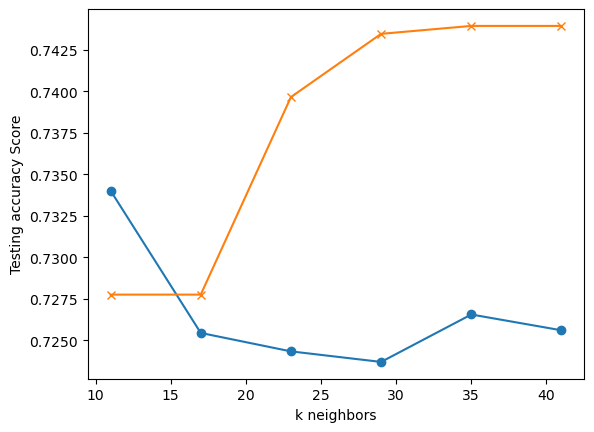

----------------------------------------------------
(8735, 3)
(8735,)
Fencing
k: 11, Train/Test Score: 0.843/0.842
k: 17, Train/Test Score: 0.840/0.843
k: 23, Train/Test Score: 0.838/0.844
k: 29, Train/Test Score: 0.839/0.844
k: 35, Train/Test Score: 0.839/0.844
k: 41, Train/Test Score: 0.839/0.844


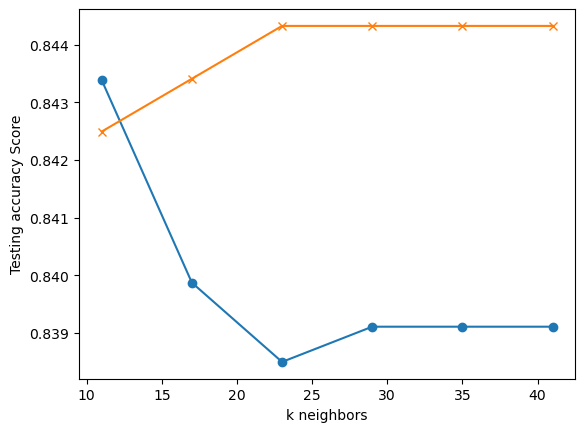

----------------------------------------------------
(5098, 3)
(5098,)
Equestrianism
k: 11, Train/Test Score: 0.845/0.856
k: 17, Train/Test Score: 0.849/0.862
k: 23, Train/Test Score: 0.849/0.863
k: 29, Train/Test Score: 0.848/0.862
k: 35, Train/Test Score: 0.848/0.862
k: 41, Train/Test Score: 0.848/0.862


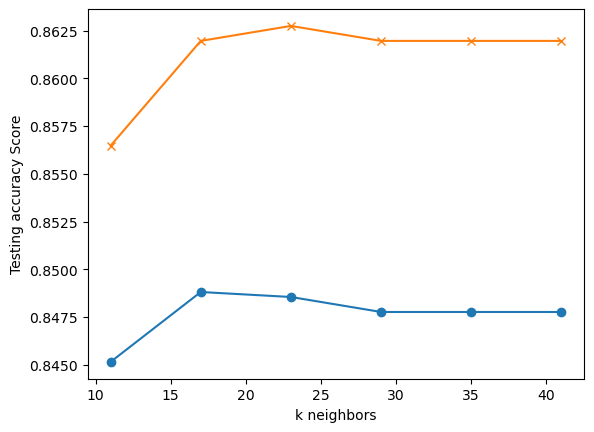

----------------------------------------------------
(9724, 3)
(9724,)
Shooting
k: 11, Train/Test Score: 0.886/0.893
k: 17, Train/Test Score: 0.887/0.893
k: 23, Train/Test Score: 0.887/0.893
k: 29, Train/Test Score: 0.887/0.893
k: 35, Train/Test Score: 0.887/0.893
k: 41, Train/Test Score: 0.887/0.893


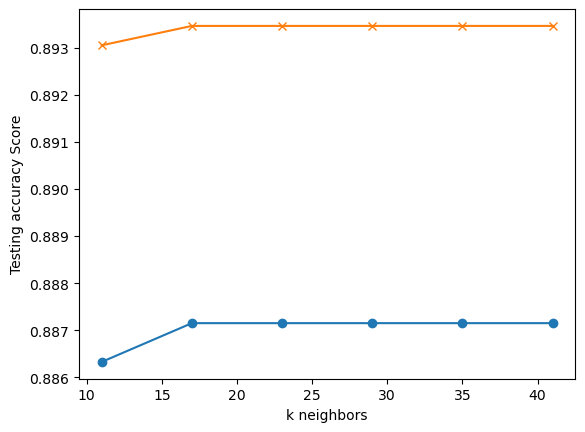

----------------------------------------------------
(5975, 3)
(5975,)
Boxing
k: 11, Train/Test Score: 0.850/0.833
k: 17, Train/Test Score: 0.850/0.833
k: 23, Train/Test Score: 0.850/0.833
k: 29, Train/Test Score: 0.850/0.833
k: 35, Train/Test Score: 0.850/0.833
k: 41, Train/Test Score: 0.850/0.833


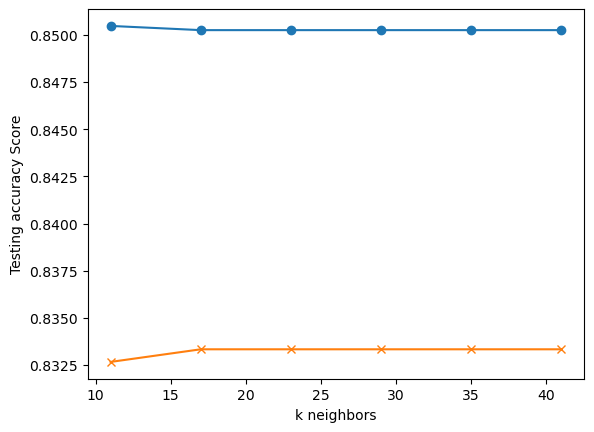

----------------------------------------------------
(307, 3)
(307,)
Taekwondo
k: 11, Train/Test Score: 0.770/0.753
k: 17, Train/Test Score: 0.765/0.753
k: 23, Train/Test Score: 0.770/0.753
k: 29, Train/Test Score: 0.770/0.753
k: 35, Train/Test Score: 0.770/0.753
k: 41, Train/Test Score: 0.770/0.753


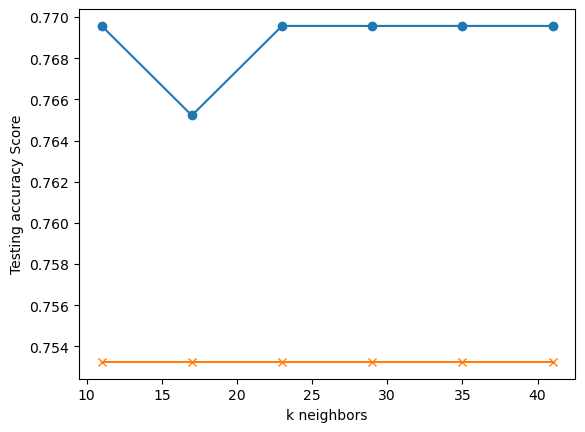

----------------------------------------------------
(9465, 3)
(9465,)
Cycling
k: 11, Train/Test Score: 0.888/0.880
k: 17, Train/Test Score: 0.887/0.879
k: 23, Train/Test Score: 0.887/0.879
k: 29, Train/Test Score: 0.887/0.880
k: 35, Train/Test Score: 0.887/0.880
k: 41, Train/Test Score: 0.887/0.880


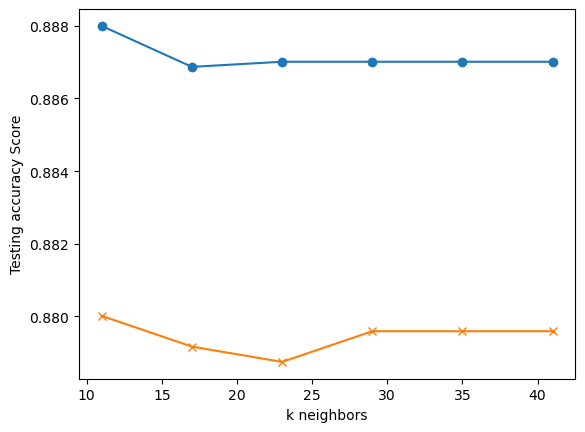

----------------------------------------------------
(1632, 3)
(1632,)
Diving
k: 11, Train/Test Score: 0.873/0.831
k: 17, Train/Test Score: 0.869/0.831
k: 23, Train/Test Score: 0.870/0.836
k: 29, Train/Test Score: 0.870/0.836
k: 35, Train/Test Score: 0.870/0.836
k: 41, Train/Test Score: 0.870/0.836


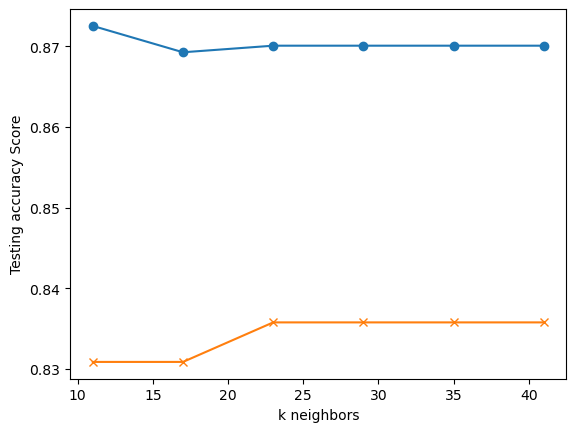

----------------------------------------------------
(4791, 3)
(4791,)
Canoeing
k: 11, Train/Test Score: 0.823/0.804
k: 17, Train/Test Score: 0.818/0.810
k: 23, Train/Test Score: 0.818/0.810
k: 29, Train/Test Score: 0.818/0.810
k: 35, Train/Test Score: 0.818/0.810
k: 41, Train/Test Score: 0.818/0.810


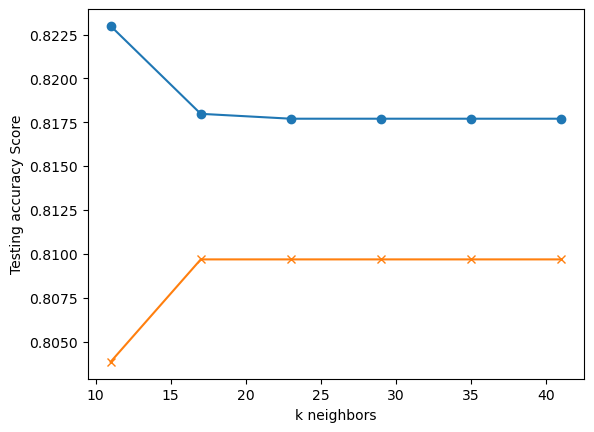

----------------------------------------------------
(1684, 3)
(1684,)
Tennis
k: 11, Train/Test Score: 0.881/0.881
k: 17, Train/Test Score: 0.881/0.881
k: 23, Train/Test Score: 0.881/0.881
k: 29, Train/Test Score: 0.881/0.881
k: 35, Train/Test Score: 0.881/0.881
k: 41, Train/Test Score: 0.881/0.881


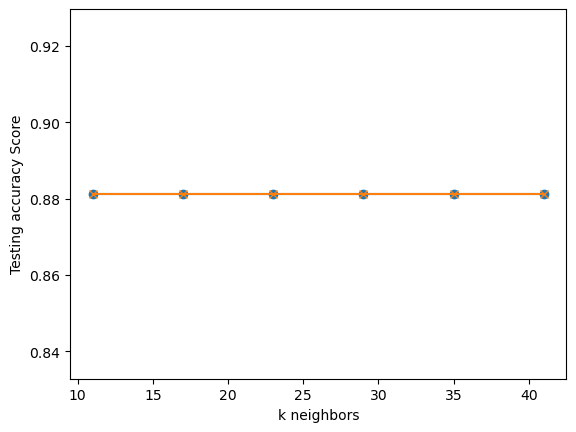

----------------------------------------------------
(1513, 3)
(1513,)
Modern Pentathlon
k: 11, Train/Test Score: 0.883/0.894
k: 17, Train/Test Score: 0.884/0.897
k: 23, Train/Test Score: 0.884/0.897
k: 29, Train/Test Score: 0.884/0.897
k: 35, Train/Test Score: 0.884/0.897
k: 41, Train/Test Score: 0.884/0.897


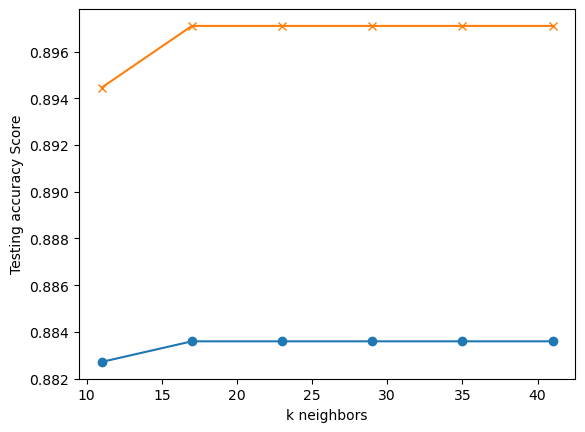

----------------------------------------------------
(177, 3)
(177,)
Golf
k: 11, Train/Test Score: 0.765/0.778
k: 17, Train/Test Score: 0.758/0.778
k: 23, Train/Test Score: 0.750/0.800
k: 29, Train/Test Score: 0.758/0.822
k: 35, Train/Test Score: 0.758/0.822
k: 41, Train/Test Score: 0.758/0.822


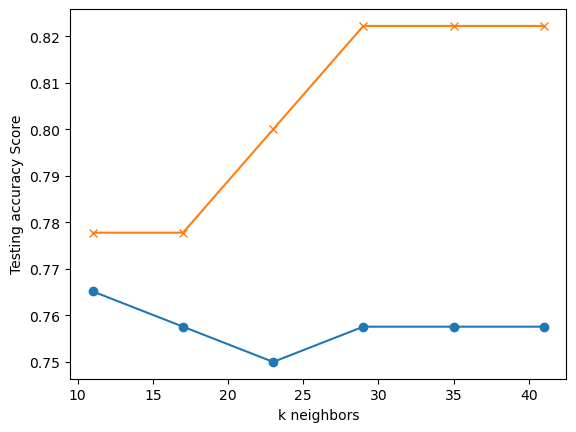

----------------------------------------------------
(0, 3)
(0,)
Softball
An exception occurred
----------------------------------------------------
(1319, 3)
(1319,)
Archery
k: 11, Train/Test Score: 0.837/0.839
k: 17, Train/Test Score: 0.832/0.827
k: 23, Train/Test Score: 0.825/0.827
k: 29, Train/Test Score: 0.820/0.836
k: 35, Train/Test Score: 0.824/0.836
k: 41, Train/Test Score: 0.829/0.830


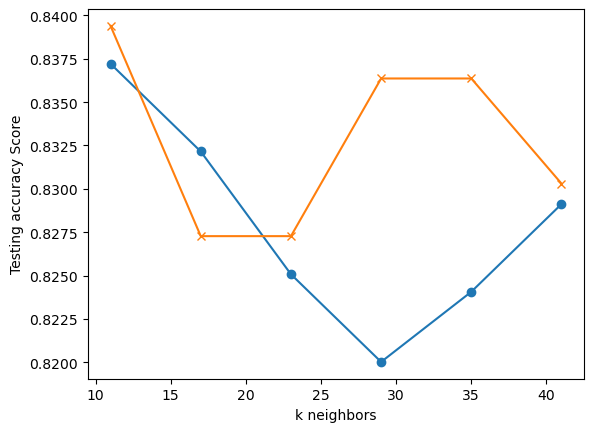

----------------------------------------------------
(1861, 3)
(1861,)
Volleyball
k: 11, Train/Test Score: 0.758/0.727
k: 17, Train/Test Score: 0.738/0.727
k: 23, Train/Test Score: 0.742/0.721
k: 29, Train/Test Score: 0.735/0.725
k: 35, Train/Test Score: 0.735/0.725
k: 41, Train/Test Score: 0.731/0.725


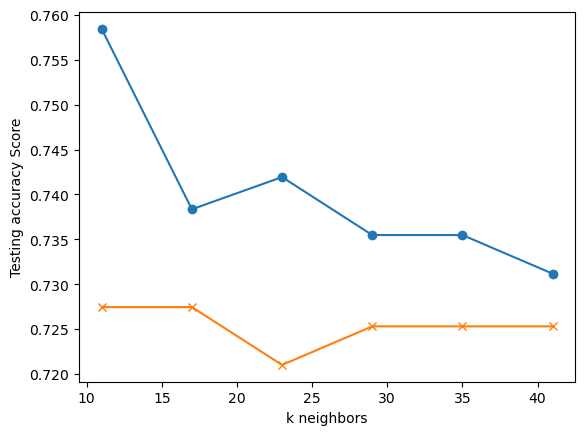

----------------------------------------------------
(0, 3)
(0,)
Synchronized Swimming
An exception occurred
----------------------------------------------------
(1002, 3)
(1002,)
Table Tennis
k: 11, Train/Test Score: 0.912/0.928
k: 17, Train/Test Score: 0.912/0.928
k: 23, Train/Test Score: 0.912/0.928
k: 29, Train/Test Score: 0.912/0.928
k: 35, Train/Test Score: 0.912/0.928
k: 41, Train/Test Score: 0.912/0.928


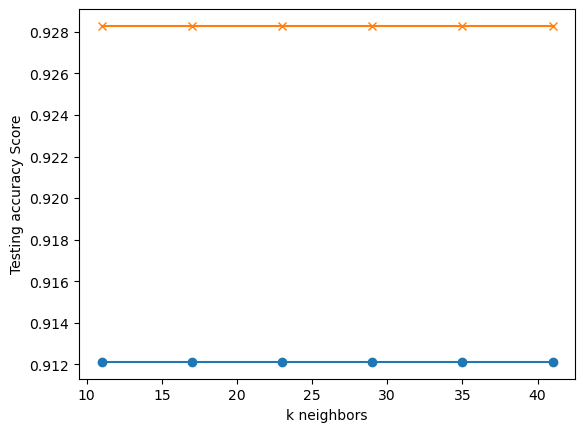

----------------------------------------------------
(894, 3)
(894,)
Baseball
k: 11, Train/Test Score: 0.657/0.585
k: 17, Train/Test Score: 0.627/0.607
k: 23, Train/Test Score: 0.633/0.594
k: 29, Train/Test Score: 0.633/0.612
k: 35, Train/Test Score: 0.640/0.621
k: 41, Train/Test Score: 0.633/0.607


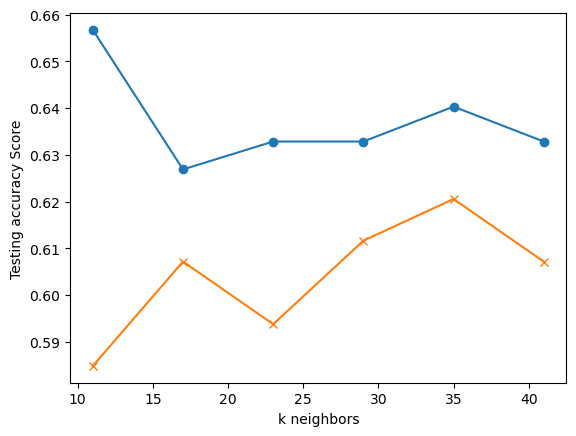

----------------------------------------------------
(0, 3)
(0,)
Rhythmic Gymnastics
An exception occurred
----------------------------------------------------
(151, 3)
(151,)
Rugby Sevens
k: 11, Train/Test Score: 0.779/0.632
k: 17, Train/Test Score: 0.779/0.658
k: 23, Train/Test Score: 0.779/0.658
k: 29, Train/Test Score: 0.779/0.658
k: 35, Train/Test Score: 0.779/0.658
k: 41, Train/Test Score: 0.779/0.658


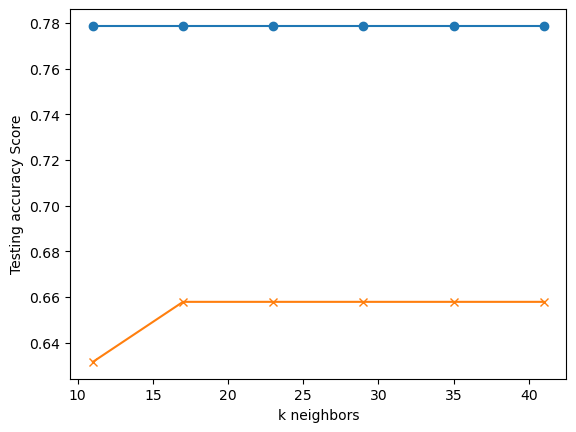

----------------------------------------------------
(76, 3)
(76,)
Trampolining
k: 11, Train/Test Score: 0.772/0.895
k: 17, Train/Test Score: 0.772/0.895
k: 23, Train/Test Score: 0.772/0.895
k: 29, Train/Test Score: 0.772/0.895
k: 35, Train/Test Score: 0.772/0.895
k: 41, Train/Test Score: 0.772/0.895


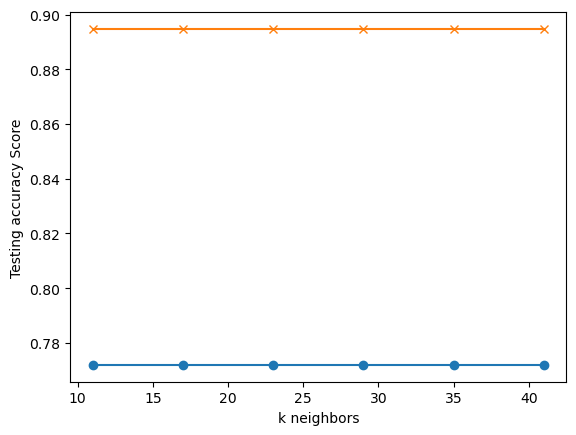

----------------------------------------------------
(288, 3)
(288,)
Beach Volleyball
k: 11, Train/Test Score: 0.861/0.931
k: 17, Train/Test Score: 0.856/0.931
k: 23, Train/Test Score: 0.856/0.931
k: 29, Train/Test Score: 0.856/0.931
k: 35, Train/Test Score: 0.856/0.931
k: 41, Train/Test Score: 0.856/0.931


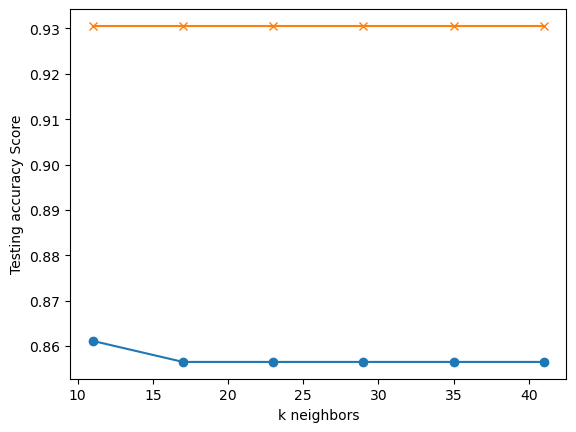

----------------------------------------------------
(266, 3)
(266,)
Triathlon
k: 11, Train/Test Score: 0.950/0.925
k: 17, Train/Test Score: 0.950/0.925
k: 23, Train/Test Score: 0.950/0.925
k: 29, Train/Test Score: 0.950/0.925
k: 35, Train/Test Score: 0.950/0.925
k: 41, Train/Test Score: 0.950/0.925


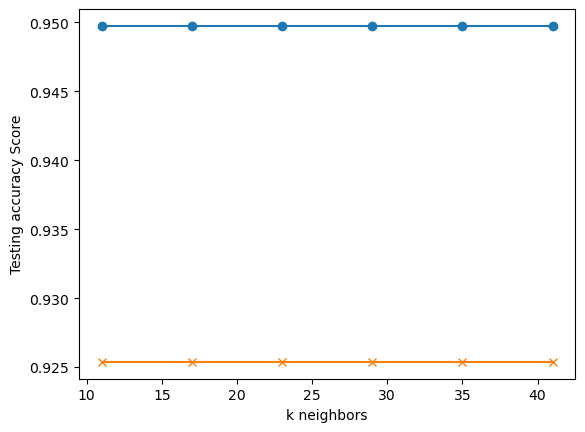

----------------------------------------------------
(162, 3)
(162,)
Rugby
k: 11, Train/Test Score: 1.000/1.000
k: 17, Train/Test Score: 1.000/1.000
k: 23, Train/Test Score: 1.000/1.000
k: 29, Train/Test Score: 1.000/1.000
k: 35, Train/Test Score: 1.000/1.000
k: 41, Train/Test Score: 1.000/1.000


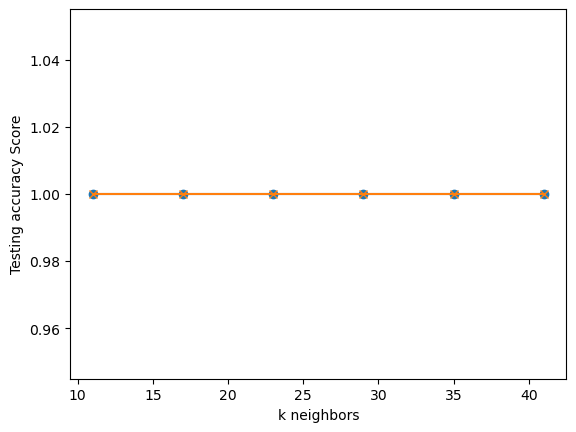

----------------------------------------------------
(60, 3)
(60,)
Lacrosse
k: 11, Train/Test Score: 1.000/1.000
k: 17, Train/Test Score: 1.000/1.000
k: 23, Train/Test Score: 1.000/1.000
k: 29, Train/Test Score: 1.000/1.000
k: 35, Train/Test Score: 1.000/1.000
k: 41, Train/Test Score: 1.000/1.000


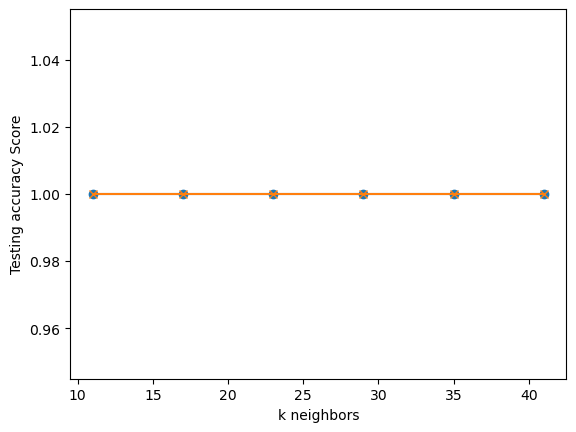

----------------------------------------------------
(95, 3)
(95,)
Polo
k: 11, Train/Test Score: 0.690/0.792
k: 17, Train/Test Score: 0.648/0.833
k: 23, Train/Test Score: 0.648/0.875
k: 29, Train/Test Score: 0.648/0.875
k: 35, Train/Test Score: 0.648/0.875
k: 41, Train/Test Score: 0.648/0.875


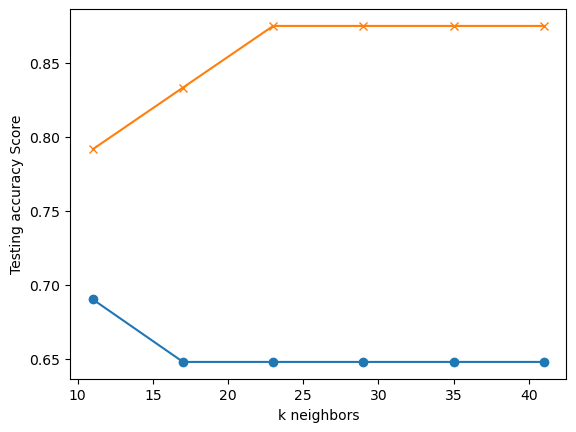

----------------------------------------------------
(24, 3)
(24,)
Cricket
k: 11, Train/Test Score: 1.000/1.000
k: 17, Train/Test Score: 1.000/1.000
An exception occurred
----------------------------------------------------
(60, 3)
(60,)
Ice Hockey
k: 11, Train/Test Score: 0.689/0.733
k: 17, Train/Test Score: 0.578/0.733
k: 23, Train/Test Score: 0.489/0.733
k: 29, Train/Test Score: 0.489/0.733
k: 35, Train/Test Score: 0.489/0.733
k: 41, Train/Test Score: 0.533/0.600


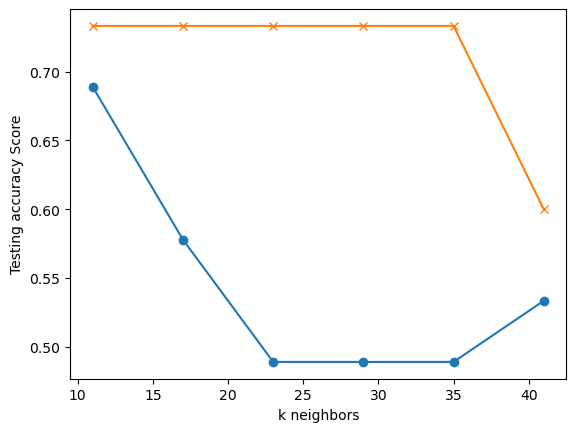

----------------------------------------------------
(12, 3)
(12,)
Racquets
An exception occurred
----------------------------------------------------
(16, 3)
(16,)
Motorboating
k: 11, Train/Test Score: 0.583/0.000
An exception occurred
----------------------------------------------------
(13, 3)
(13,)
Croquet
An exception occurred
----------------------------------------------------
(32, 3)
(32,)
Figure Skating
k: 11, Train/Test Score: 0.667/0.625
k: 17, Train/Test Score: 0.583/0.375
k: 23, Train/Test Score: 0.583/0.375
An exception occurred
----------------------------------------------------
(11, 3)
(11,)
Jeu De Paume
An exception occurred
----------------------------------------------------
(4, 3)
(4,)
Roque
An exception occurred
----------------------------------------------------
(2, 3)
(2,)
Basque Pelota
An exception occurred
----------------------------------------------------
(3, 3)
(3,)
Alpinism
An exception occurred
----------------------------------------------------
(1, 3)

In [29]:

for sport in summer_sports:
    try:
        athlete_m = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding                
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        # Assign X (data) and y (target)        
        X = athlete_m[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_m['Medal'] 
        print(y.shape)
        print(sport)

        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a StandardScater model and fit it to the training data 
        X_scaler = StandardScaler().fit(X_train)
        
        # Transform the training and testing data using the X_scaler and y_scaler models
        X_train_scaled = X_scaler.transform(X_train)
        X_test_scaled = X_scaler.transform(X_test)
        
        train_scores = []
        test_scores = []
        
        # Loop through different k values to see which has the highest accuracy
        for k in range(11, 47, 6):
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            train_score = knn.score(X_train_scaled, y_train)
            test_score = knn.score(X_test_scaled, y_test)
            train_scores.append(train_score)
            test_scores.append(test_score)
            print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


        plt.plot(range(11, 47, 6), train_scores, marker='o')
        plt.plot(range(11, 47, 6), test_scores, marker="x")
        plt.xlabel("k neighbors")
        plt.ylabel("Testing accuracy Score")
        plt.show()
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

best accuracy scores achieved in each game separately and the corresponding k value:

Basketball: The best accuracy score achieved is 0.807 with k=11.

Judo: The best accuracy score achieved is 0.867 with k=11, 17, 23, 29, 35, and 41.

Football: The best accuracy score achieved is 0.792 with k=35.

Tug-Of-War: The best accuracy score achieved is 0.685 with k=17.

Athletics: The best accuracy score achieved is 0.900 with k=11, 17, 23, 29, 35, and 41.

Swimming: The best accuracy score achieved is 0.881 with k=23.

Badminton: The best accuracy score achieved is 0.890 with k=11, 17, 23, 29, 35, and 41.

Sailing: The best accuracy score achieved is 0.807 with k=29, 35, and 41.

Gymnastics: The best accuracy score achieved is 0.913 with k=11.

Art Competitions: The best accuracy score achieved is 0.955 with k=11, 17, 23, 29, 35, and 41.

k=11: In some cases, k=11 may be the best choice because it is a small enough value to avoid overfitting to the training data, but large enough to get a good estimate of the true class labels in the test data.

k=23 or k=29: In some cases, k=23 or k=29 may be the best choice because they strike a balance between overfitting and underfitting, and result in good accuracy scores for both the training and test data.

# Logistic Regression

In [30]:
# print out every sport in the summer Olympic
summer_data["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [31]:
summer_sports = summer_data["Sport"].unique()

#### For loop to train the Logistic Regression model and get the testing score for male athletes in every Summer Olympic Sport

In [32]:

''' Logistic Regression model for male athletes in each Summer Olympic Sport,
The code could be used to analyze which factors (height, weight, age) are most important for male athletes in each 
sport to win a medal.'''

for sport in summer_sports:  #the code loops through each sport in the summer_sports list.
    try:
        athlete_m = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        '''get the data for male athletes in the current sport from the summer_data DataFrame. 
        It filters the data to include only male athletes in the current sport, 
        selects the columns "Age", "Height", "Weight", and "Medal", drops any rows with missing values for "Height" or "Weight", 
        and resets the index.
        '''
        
        # One-hot encoding                
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        '''one-hot encodes the "Medal" column by replacing "Gold", "Silver", and "Bronze" with 1,
        and replaces any missing values in the "Medal" column with 0.'''
        
        
        # Assign X (data) and y (target)        
        X1 = athlete_m[['Height', "Weight", "Age"]] 
        print(X1.shape) 
        y1 = athlete_m['Medal'] 
        print(y1.shape)
        print(sport)

        '''assigns X (data) and y (target) variables.
        X1 contains the columns "Height", "Weight", and "Age", and y1 contains the "Medal" column.'''
        
        
        # Split our data into training and testing
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        
        #Fit (train) or model using the training data
        classifier.fit(X1_train, y1_train)
        
        #Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X1_train, y1_train)}") 
        print(f"Testing Data Score: {classifier.score(X1_test, y1_test)}")
        
        # Predict the testing data point
        predictions = classifier.predict(X1_test)

        pd.DataFrame({"Prediction": predictions, "Actual": y1_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")
        
        


(3280, 3)
(3280,)
Basketball
Training Data Score: 0.7878048780487805
Testing Data Score: 0.7902439024390244
----------------------------------------------------
(2708, 3)
(2708,)
Judo
Training Data Score: 0.8655834564254062
Testing Data Score: 0.8818316100443131
----------------------------------------------------
(5733, 3)
(5733,)
Football
Training Data Score: 0.7743661316585252
Testing Data Score: 0.791492329149233
----------------------------------------------------
(170, 3)
(170,)
Tug-Of-War
Training Data Score: 0.7086614173228346
Testing Data Score: 0.7441860465116279
----------------------------------------------------
(26958, 3)
(26958,)
Athletics
Training Data Score: 0.9001384904540508
Testing Data Score: 0.8998516320474778
----------------------------------------------------
(13345, 3)
(13345,)
Swimming
Training Data Score: 0.8730015987210232
Testing Data Score: 0.879232843871741
----------------------------------------------------
(717, 3)
(717,)
Badminton
Training Data Score

The best accuracy in each sport is:

Basketball: 79%

Judo: 88%

Football: 79%

Tug-Of-War: 74%

Athletics: 90%

Swimming: 88%

Badminton: 86%

Sailing: 80%

Gymnastics: 91%

Art Competitions: 95%

Handball: 74%

Weightlifting: 84%


Wrestling: 83%

Water Polo: 76%

Hockey: 72%

Rowing: 75%

Fencing: 84%

Equestrianism: 86%

Shooting: 89%

Boxing: 83%

Taekwondo: 75%

Cycling: 88%

Diving: 83%

Canoeing: 81%

Tennis: 88%

Modern Pentathlon: 90%

Golf: 71%

#### For loop to train the Logistic Regression model and get the testing score for female athletes in every Summer Olympic Sport

In [33]:
for sport in summer_sports:
    try:
        athlete_f = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "F")]
        athlete_f = athlete_f[["Age", "Height", "Weight", "Medal"]]
        athlete_f = athlete_f.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding        
        athlete_f = athlete_f.replace("Gold", 1)
        athlete_f = athlete_f.replace("Silver", 1)
        athlete_f = athlete_f.replace("Bronze", 1)
        athlete_f["Medal"] = athlete_f["Medal"].fillna(0)
        athlete_f = athlete_f.dropna()
        athlete_f["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_f[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_f['Medal'] 
        print(y.shape)
        print(sport)

        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
        # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point
        predictions = classifier.predict(X_test)

        pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(1256, 3)
(1256,)
Basketball
Training Data Score: 0.6772823779193206
Testing Data Score: 0.7165605095541401
----------------------------------------------------
(1093, 3)
(1093,)
Judo
Training Data Score: 0.8058608058608059
Testing Data Score: 0.864963503649635
----------------------------------------------------
(1012, 3)
(1012,)
Football
Training Data Score: 0.7075098814229249
Testing Data Score: 0.6679841897233202
----------------------------------------------------
(0, 3)
(0,)
Tug-Of-War
An exception occurred
----------------------------------------------------
(11666, 3)
(11666,)
Athletics
Training Data Score: 0.8901588753000342
Testing Data Score: 0.8923551594103531
----------------------------------------------------
(9850, 3)
(9850,)
Swimming
Training Data Score: 0.8588060105590903
Testing Data Score: 0.8656110434429557
----------------------------------------------------
(740, 3)
(740,)
Badminton
Training Data Score: 0.8864864864864865
Testing Data Score: 0.8864864864864865
--


The accuracy scores of the training and testing data are provided for each sport, indicating how well the model has been trained to classify the given sport's

Judo has the highest accuracy score on both training and testing data, indicating that the model has been trained well to classify Judo

Golf has the highest training data score, indicating that the model has been trained well on the Golf, whereas Basketball has the lowest training data score.

Boxing has the lowest testing data score, indicating that the model does not generalize well to new data for Boxing

The accuracy scores of some sports have not been provided, likely because either there is no data available for these sports or an exception occurred during the model training.

In [34]:
# print out every sport in the winter Olympic
winter_data['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [35]:
winter_sports = winter_data['Sport'].unique()

#### For loop to train the Logistic Regression model and get the testing score for male athletes in every Winter Olympic Sport

In [36]:
for sport in winter_sports:
    try:
        athlete_m = winter_data[(winter_data["Sport"] == f'{sport}') & (winter_data["Sex"] == "M")]
        athlete_m = athlete_m[["Age", "Height", "Weight", "Medal"]]
        athlete_m = athlete_m.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding
        athlete_m = athlete_m.replace("Gold", 1)
        athlete_m = athlete_m.replace("Silver", 1)
        athlete_m = athlete_m.replace("Bronze", 1)
        athlete_m["Medal"] = athlete_m["Medal"].fillna(0)
        athlete_m = athlete_m.dropna()
        athlete_m["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_m[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_m['Medal'] 
        print(y.shape)
        print(sport)
        
        # Split our data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
         # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point
        #predictions = classifier.predict(X_test)

        #pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(3532, 3)
(3532,)
Speed Skating
Training Data Score: 0.9056247640619102
Testing Data Score: 0.9003397508493771
----------------------------------------------------
(5748, 3)
(5748,)
Cross Country Skiing
Training Data Score: 0.9253073532823011
Testing Data Score: 0.9199721642310369
----------------------------------------------------
(4702, 3)
(4702,)
Ice Hockey
Training Data Score: 0.7376630743051616
Testing Data Score: 0.7636054421768708
----------------------------------------------------
(3030, 3)
(3030,)
Biathlon
Training Data Score: 0.9212147887323944
Testing Data Score: 0.895778364116095
----------------------------------------------------
(5431, 3)
(5431,)
Alpine Skiing
Training Data Score: 0.9589982813650871
Testing Data Score: 0.9646539027982327
----------------------------------------------------
(1102, 3)
(1102,)
Luge
Training Data Score: 0.8934624697336562
Testing Data Score: 0.8297101449275363
----------------------------------------------------
(2915, 3)
(2915,)
Bobsleigh

Insights from the given accuracy scores:

1)The highest training and testing data score was achieved for Alpine Skiing, indicating that the model was able to predict accurately for this sport.

2)Curling had the lowest testing data score among all sports, which means that the model was not able to generalize well on this sport.

3)For Skeleton, the testing data score was 1.0, which suggests that the model was able to predict perfectly for this sport.

4)The testing data score was generally higher than the training data score for most sports, which means that the model was able to generalize well on unseen data.

5)The training and testing data scores for Ice Hockey were lower than other sports, indicating that the model did not perform as well for this sport compared to others.

6)The testing data score for Military Ski Patrol and Alpinism were not provided due to an exception.

#### For loop to train the Logistic Regression model and get the testing score for female athletes in every Winter Olympic Sport

In [37]:
for sport in winter_sports:
    try:
        athlete_f = winter_data[(winter_data["Sport"] == f'{sport}') & (winter_data["Sex"] == "F")]
        athlete_f = athlete_f[["Age", "Height", "Weight", "Medal"]]
        athlete_f = athlete_f.dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding
        athlete_f = athlete_f.replace("Gold", 1)
        athlete_f = athlete_f.replace("Silver", 1)
        athlete_f = athlete_f.replace("Bronze", 1)
        athlete_f["Medal"] = athlete_f["Medal"].fillna(0)
        athlete_f = athlete_f.dropna()
        athlete_f["Medal"].unique()
        
        # Assign X (data) and y (target)
        X = athlete_f[['Height', "Weight", "Age"]] 
        print(X.shape) 
        y = athlete_f['Medal'] 
        print(y.shape)
        print(sport)
        
        # Split our data into training and testing

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
        # Create a Logistic Regression Model
        classifier = LogisticRegression() 
        classifier
        
        # Fit (train) or model using the training data
        classifier.fit(X_train, y_train)
        
         # Validate the model using the test data
        print(f"Training Data Score: {classifier.score(X_train, y_train)}") 
        print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
        
        # Predict the testing data point

        #predictions = classifier.predict(X_test)

        #pd.DataFrame({"Prediction": predictions, "Actual": y_test})
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

(2081, 3)
(2081,)
Speed Skating
Training Data Score: 0.8826923076923077
Testing Data Score: 0.8867562380038387
----------------------------------------------------
(3385, 3)
(3385,)
Cross Country Skiing
Training Data Score: 0.9042553191489362
Testing Data Score: 0.8866587957497049
----------------------------------------------------
(754, 3)
(754,)
Ice Hockey
Training Data Score: 0.6584070796460177
Testing Data Score: 0.6137566137566137
----------------------------------------------------
(1863, 3)
(1863,)
Biathlon
Training Data Score: 0.9284180386542591
Testing Data Score: 0.8927038626609443
----------------------------------------------------
(3398, 3)
(3398,)
Alpine Skiing
Training Data Score: 0.9368131868131868
Testing Data Score: 0.9388235294117647
----------------------------------------------------
(377, 3)
(377,)
Luge
Training Data Score: 0.8900709219858156
Testing Data Score: 0.8526315789473684
----------------------------------------------------
(143, 3)
(143,)
Bobsleigh
Trai

1)Speed Skating has a relatively high training data score, but its testing data score is lower, which may indicate overfitting.

2)Cross Country Skiing has a high training and testing data score, which suggests that the model is performing well for this sport.

3)Ice Hockey has a relatively low training and testing data score, which indicates that the model is not performing well for this sport and may need more data or a different approach.

4)Biathlon has high training and testing data scores, indicating good performance of the model for this sport.

5)Alpine Skiing has a high training and testing data score, indicating good performance of the model for this sport.

6)Luge has a high training data score, but its testing data score is lower, which may indicate overfitting.

7)Bobsleigh has similar training and testing data scores, indicating that the model is performing consistently for this sport.

8)Nordic Combined and Alpinism have no data available to train or test the model, so no insights can be driven.

9)Freestyle Skiing has high training and testing data scores, indicating good performance of the model for this sport.

10)Ski Jumping has a perfect training data score, but its testing data score is lower, which may indicate overfitting.

11)Curling has a relatively low training and testing data score, which indicates that the model is not performing well for this sport and may need more data or a different approach.

12)Snowboarding has high training and testing data scores, indicating good performance of the model for this sport.

13)Short Track Speed Skating has a higher training data score than testing data score, which may indicate overfitting.

14)Skeleton has a relatively low testing data score, which indicates that the model is not performing well for this sport and may need more data or a different approach.

### Random forest

#### For loop to train the Random Forest model and get the testing score for male athletes in every Summer Olympic Sport

In [38]:
for sport in summer_sports:
    try:
        athlete_m  = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_m  = athlete_m [["Age", "Height", "Weight", "Medal"]]
        athlete_m  = athlete_m .dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding                

        athlete_m  = athlete_m .replace("Gold", 1)
        athlete_m  = athlete_m .replace("Silver", 1)
        athlete_m  = athlete_m .replace("Bronze", 1)
        athlete_m ["Medal"] = athlete_m ["Medal"].fillna(0)
        athlete_m  = athlete_m .dropna()
        athlete_m ["Medal"].unique()

        print(sport)
        
        # Assign X (data) and y (target)        

        target = athlete_m ["Medal"]
        target_names = ["Medals", "None"]
        data = athlete_m .drop("Medal", axis=1)
        feature_names = data.columns
        data.head()
        
        # Split our data into training and testing

        X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        
        # Create a random forest classifier
        
        rf = RandomForestClassifier(n_estimators=200)
        rf = rf.fit(X_train, y_train)
        print("Training Data Score:", rf.score(X_train, y_train)) 
        print("Testing Data Score:", rf.score(X_test, y_test))
        
        # Sort the features by their importance

        print(sorted(zip(rf.feature_importances_, feature_names), reverse=True))
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")

Basketball
Training Data Score: 0.9565040650406504
Testing Data Score: 0.7609756097560976
[(0.41406544571166676, 'Weight'), (0.36143323397718824, 'Height'), (0.22450132031114511, 'Age')]
----------------------------------------------------
Judo
Training Data Score: 0.9601181683899557
Testing Data Score: 0.8478581979320532
[(0.3705087813973446, 'Weight'), (0.35124779414765955, 'Height'), (0.27824342445499584, 'Age')]
----------------------------------------------------
Football
Training Data Score: 0.868574086996976
Testing Data Score: 0.7545327754532776
[(0.37722364494840965, 'Height'), (0.34398975154818956, 'Weight'), (0.2787866035034008, 'Age')]
----------------------------------------------------
Tug-Of-War
Training Data Score: 0.8346456692913385
Testing Data Score: 0.5581395348837209
[(0.480976975984704, 'Age'), (0.32762111477705647, 'Weight'), (0.1914019092382396, 'Height')]
----------------------------------------------------
Athletics
Training Data Score: 0.9330299732911267
Test

1)There is a significant variation in the training and testing scores across the sports. Some sports have very high training scores (close to 1.0) but much lower testing scores, indicating that the model is overfitting to the training data. On the other hand, some sports have more balanced scores, which implies the model is generalizing well to new data.

2)Weight is the most important feature for most of the sports, indicating that it is a crucial factor in determining athletic performance across different sports. Height is also an important feature, though less important than weight, and age is the least important.

3)Some sports have a relatively low importance for weight, which could indicate that factors such as technique, skill, and agility are more critical in those sports. For example, Badminton has a higher importance for height than weight.

4)Gymnastics and Art Competitions have the highest testing scores, indicating that the model performs the best for these sports. This could be because these sports have a greater focus on individual performances, which makes them more predictable.

5)Tug-Of-War has the lowest testing score, indicating that the model performs the worst for this sport. This could be due to the limited number of observations for this sport, making it more challenging for the model to learn the underlying patterns.

6)In general, the model performs better on sports that are less reliant on team dynamics, such as Gymnastics and Art Competitions. Sports that are more dependent on teamwork, such as Handball, Water Polo, and Hockey, have lower testing scores, indicating that the model may struggle to capture the complex interplay between team members.

#### For loop to train the Random Forest model and get the testing score for female athletes in every Summer Olympic Sport

In [39]:
for sport in summer_sports:
    try:
        athlete_f  = summer_data[(summer_data["Sport"] == f'{sport}') & (summer_data["Sex"] == "M")]
        athlete_f  = athlete_f [["Age", "Height", "Weight", "Medal"]]
        athlete_f  = athlete_f .dropna(subset=['Height', 'Weight']).reset_index(drop = True)
        
        # One-hot encoding                

        athlete_f  = athlete_f .replace("Gold", 1)
        athlete_f  = athlete_f .replace("Silver", 1)
        athlete_f  = athlete_f .replace("Bronze", 1)
        athlete_f ["Medal"] = athlete_f ["Medal"].fillna(0)
        athlete_f  = athlete_f .dropna()
        athlete_f ["Medal"].unique()

        print(sport)
        
        # Assign X (data) and y (target)        

        target = athlete_f ["Medal"]
        target_names = ["Medals", "None"]
        data = athlete_f .drop("Medal", axis=1)
        feature_names = data.columns
        data.head()
        
        # Split our data into training and testing

        X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        
        # Create a random forest classifier
        rf = RandomForestClassifier(n_estimators=200)
        rf = rf.fit(X_train, y_train)
        print("Training Data Score:", rf.score(X_train, y_train)) 
        print("Testing Data Score:", rf.score(X_test, y_test))
        
        # Sort the features by their importance
        
        print(sorted(zip(rf.feature_importances_, feature_names), reverse=True))
        print("----------------------------------------------------")
    except:
        print("An exception occurred")
        print("----------------------------------------------------")


Basketball
Training Data Score: 0.9565040650406504
Testing Data Score: 0.7560975609756098
[(0.40994237591472144, 'Weight'), (0.36038679146541525, 'Height'), (0.22967083261986335, 'Age')]
----------------------------------------------------
Judo
Training Data Score: 0.9601181683899557
Testing Data Score: 0.8522895125553914
[(0.36679970608013174, 'Weight'), (0.3614190756231616, 'Height'), (0.27178121829670654, 'Age')]
----------------------------------------------------
Football
Training Data Score: 0.868574086996976
Testing Data Score: 0.7524407252440726
[(0.3679744822157616, 'Height'), (0.3473442768405942, 'Weight'), (0.2846812409436441, 'Age')]
----------------------------------------------------
Tug-Of-War
Training Data Score: 0.8346456692913385
Testing Data Score: 0.5813953488372093
[(0.479022724721735, 'Age'), (0.3357378706987083, 'Weight'), (0.18523940457955673, 'Height')]
----------------------------------------------------
Athletics
Training Data Score: 0.9330299732911267
Testin

1)Gymnastics has the highest testing data score of 0.91, which indicates that the model can predict the outcomes of gymnastics events with high accuracy.

2)Tug-Of-War has the lowest testing data score of 0.55, which indicates that the model is not as effective at predicting the outcomes of tug-of-war events.

3)For most of the sports, weight is the most important feature, followed by height and then age. This suggests that weight is the most significant factor in determining success in these sports.

4)For some sports, such as gymnastics and fencing, age and height are more important than weight.

5)The training data scores are generally higher than the testing data scores, which suggests that the models are overfitting to the training data.

6)Art Competitions have a testing data score of 1.0, indicating that the model is highly effective at predicting the outcomes of art competitions. However, since art competitions are not sports, the relevance of this insight may be limited.

# SVM-->Support vector machine

In [40]:
#filters the data to select rows where the "Sport" column is "Gymnastics" and the "Sex" column is "M".
df1 = summer_data[(summer_data["Sport"] == "Gymnastics") & (summer_data["Sex"] == "M")] 

#selects only the "Age", "Height", "Weight", and "Medal" columns from the filtered data.
df1 = df1[["Age", "Height", "Weight", "Medal"]]

#drops any rows that have missing values (NaN) in the selected columns.
df1 = df1.dropna()

# resets the index of the resulting DataFrame to start from 0 and drops the original index.
df1 = df1.reset_index(drop = True)
df1.head()

,Age,Height,Weight,Medal
0,28.0,175.0,64.0,Bronze
1,28.0,175.0,64.0,Gold
2,28.0,175.0,64.0,Gold
3,28.0,175.0,64.0,Gold
4,32.0,175.0,64.0,Bronze


In [41]:
target = df1["Medal"]
target_names = ["Gold", "Silver", "Bronze"]

In [42]:
data = df1.drop("Medal", axis=1)
feature_names = data.columns
data.head()

,Age,Height,Weight
0,28.0,175.0,64.0
1,28.0,175.0,64.0
2,28.0,175.0,64.0
3,28.0,175.0,64.0
4,32.0,175.0,64.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [44]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [45]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.383


In [46]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

        Gold       0.00      0.00      0.00       117
      Silver       0.38      1.00      0.55       149
      Bronze       0.00      0.00      0.00       123

    accuracy                           0.38       389
   macro avg       0.13      0.33      0.18       389
weighted avg       0.15      0.38      0.21       389



The overall accuracy of the model is 0.38, which means that the model is predicting correctly only 38% of the time.